# Open output

In [2]:
# tell Python to use the ecco_v4_py in the 'ECCOv4-py' repository
from os.path import join,expanduser
import sys

# identify user's home directory
user_home_dir = expanduser('~')

# import the ECCOv4 py library 
sys.path.insert(0,join(user_home_dir,'ECCOv4-py'))
import ecco_v4_py as ecco

## import required packages
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import glob
import pathlib as Path

In [ ]:
file_list = glob.glob(Path(runoff_dir), '*.data')

In [4]:
help(ecco.read_llc_to_tiles(runoff_dir, fname, nl=12))

NameError: name 'runoff_dir' is not defined

In [53]:
runoff = ecco.read_llc_to_tiles(runoff_dir, fname, nl=12)

load_binary_array: loading file /efs_ecco/mzahn/r5/input/input_forcing/other/runoff-2d-Fekete-1deg-mon-V4-SMOOTH_S60scalving_v3.bin
load_binary_array: data array shape  (12, 1, 1170, 90)
load_binary_array: data array type  >f4
llc_compact_to_faces: dims, llc  (12, 1, 1170, 90) 90
llc_compact_to_faces: data_compact array type  >f4
llc_faces_to_tiles: data_tiles shape  (12, 1, 13, 90, 90)
llc_faces_to_tiles: data_tiles dtype  >f4


In [33]:
# specify that the 5th dimension should be time
runoff_da = ecco.llc_tiles_to_xda(runoff, var_type='c',dim4='depth', dim5='time')
# runoff_da

NameError: name 'runoff' is not defined

In [7]:
def read_ecco_field_to_faces(file_path, llc, dim, Nr):
    grid_array = np.fromfile(file_path,'>f4')
    N = 13*llc*llc
    field_faces = {}
    if dim == 2:
        points_counted = 0
        for i in range(1, 6):
            if i < 3:
                n_points = 3 * llc * llc
                grid = grid_array[points_counted:points_counted + n_points]
                grid = np.reshape(grid, (3 * llc, llc))
            if i == 3:
                n_points = llc * llc
                grid = grid_array[points_counted:points_counted + n_points]
                grid = np.reshape(grid, (llc, llc))
            if i > 3:
                n_points = 3 * llc * llc
                grid = grid_array[points_counted:points_counted + n_points]
                grid = np.reshape(grid, (llc, 3 * llc))
            field_faces[i] = grid
            points_counted += n_points
    if dim==3:
        for i in range(1, 6):
            if i < 3:
                face_grid = np.zeros((Nr, 3 * llc, llc))
            elif i == 3:
                face_grid = np.zeros((Nr, llc, llc))
            if i > 3:
                face_grid = np.zeros((Nr, llc, 3 * llc))
            field_faces[i]=face_grid
        for nr in range(Nr):
            points_counted = 0
            level_grid = grid_array[nr * N:(nr + 1) * N]
            for i in range(1,6):
                if i < 3:
                    n_points = 3*llc*llc
                    grid = level_grid[points_counted:points_counted+n_points]
                    grid = np.reshape(grid,(3*llc,llc))
                if i == 3:
                    n_points = llc * llc
                    grid = level_grid[points_counted:points_counted + n_points]
                    grid = np.reshape(grid, (llc, llc))
                if i > 3:
                    n_points = 3 * llc * llc
                    grid = level_grid[points_counted:points_counted + n_points]
                    grid = np.reshape(grid, (llc, 3*llc))
                field_faces[i][nr,:,:] = grid
                points_counted += n_points
    return(field_faces)

In [24]:
# define directory to runoff file
# tmp_dir = '/efs_ecco/mzahn/r5/WORKINGDIR/ECCOV4/release5/run/diags/SALT_daily_mean/SALT_daily_mean.0000195120.data'
tmp_dir = '/efs_ecco/mzahn/r5/WORKINGDIR/ECCOV4/release5/run/diags/THETA_daily_mean/THETA_daily_mean.0000195120.data'
# fname = 'runoff-2d-Fekete-1deg-mon-V4-SMOOTH_S60scalving_v3.bin'

In [25]:
tmp_ds = read_ecco_field_to_faces(tmp_dir, llc=90, dim=3, Nr=50)

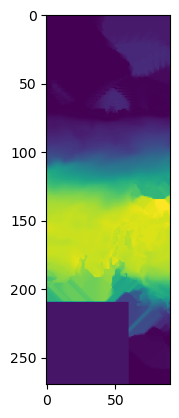

In [27]:
plt.imshow(tmp_ds[2][0]);

In [29]:
tmp_dir = '/efs_ecco/mzahn/r5/WORKINGDIR/ECCOV4/release5/run/hFacC.data'

In [30]:
tmp_ds = read_ecco_field_to_faces(tmp_dir, llc=90, dim=3, Nr=50)

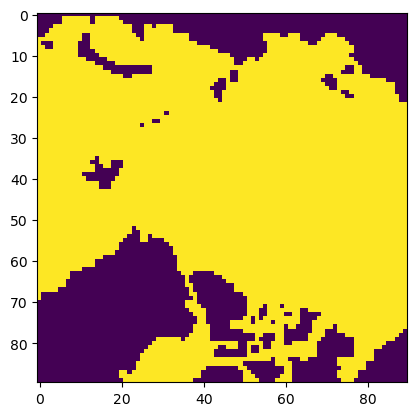

In [32]:
plt.imshow(tmp_ds[3][0]);